In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: dynamic module does not define module export function (PyInit_cv2)

In [ ]:
seal_img_filename = 'seal_cup_tooth.tif'
seal_img_full = cv2.imread(seal_img_filename)

In [ ]:
seal_img_full.shape
ds_vals = 1.0/ np.array([1,2,4,8,16])

seal_img_gray = cv2.cvtColor(seal_img_full,cv2.COLOR_RGB2GRAY)
multi_res_pyr = [cv2.resize(seal_img_gray, dsize = (0,0),fx = ds_mult, fy= ds_mult, interpolation = cv2.INTER_AREA) for ds_mult in ds_vals]


In [ ]:
plt.imshow(multi_res_pyr[-1],cmap='gray')

In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.5




In [ ]:
out_imgs = []

for im,ds_val in zip(multi_res_pyr, ds_vals):
    img_dims = im.shape
    #Max is circle filling image
    params.maxArea = np.pi * (img_dims[0]/2.0)**2
     
    # Create a detector with the parameters
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv2.SimpleBlobDetector(params)
    else : 
        detector = cv2.SimpleBlobDetector_create(params)
    
    keypoints = detector.detect(im)
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    out_imgs.append(im_with_keypoints)
    

In [ ]:
plt.figure (figsize = (10,10))
plt.imshow(out_imgs[3])

In [ ]:
#for im,ds_val in zip(multi_res_pyr, ds_vals):
im =  multi_res_pyr[3].copy()
ds_val = ds_vals[3]

img_dims = im.shape
#Max is circle filling image
mser = cv2.MSER_create(_delta = 30, 
                       _min_area = int(np.pi * (0.5 * img_dims[0]/2.0)**2), 
                       _max_area = int(np.pi * (1.0 * img_dims[0]/2.0)**2),
                       _max_variation = 0.2,
                       _min_diversity = 0,
                       _max_evolution = 200,
                       _area_threshold = 1.01,
                       _min_margin = 0.003,
                       _edge_blur_size = 1 )
regions = mser.detectRegions(im, None)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
vis = cv2.polylines(im.copy(), hulls, 1, (0, 255, 0))


In [ ]:
plt.figure (figsize=(10,10))
plt.imshow (vis)

In [ ]:
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

edges = canny(im, sigma=3, low_threshold=20, high_threshold=30)
plt.figure(figsize=(10,10))
plt.imshow(edges)


In [ ]:
# Detect two radii
min_r = 0.9*img_dims[0]/2.0
max_r = 1.0*img_dims[0]/2.0
    
hough_radii = np.arange(min_r, max_r, 1)
hough_res = hough_circle(edges, hough_radii)

In [336]:
centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract a circle
    num_peaks = 1
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)
    
#Find beginning and end of threaded portion
peak_inds = peak_local_max(np.array(accums), num_peaks=2)

peak_inds = peak_unds * 

In [335]:
bands = []
band_dims = []
radius_vals = []
bands_eq_len = []
band_eq_vec = np.linspace(0,2*np.pi,10000)
#For all radii between the peaks, extract the image as a band
for idx in range(peak_inds[0,0],peak_inds[1,0]):
    radius = radii[idx]
    center_x, center_y = centers[idx]
    cx, cy = circle_perimeter(center_y, center_x, int(radius))
    band = im[cx,cy]
    bands.append(band) #- np.mean(band))
    #band_dims.append(np.linspace(0,2*np.pi,len(bands[-1])))
    #radius_vals.append(radius)
    #bands_eq_len.append(np.interp (band_eq_vec,band_dims[-1],bands[-1]))

2096

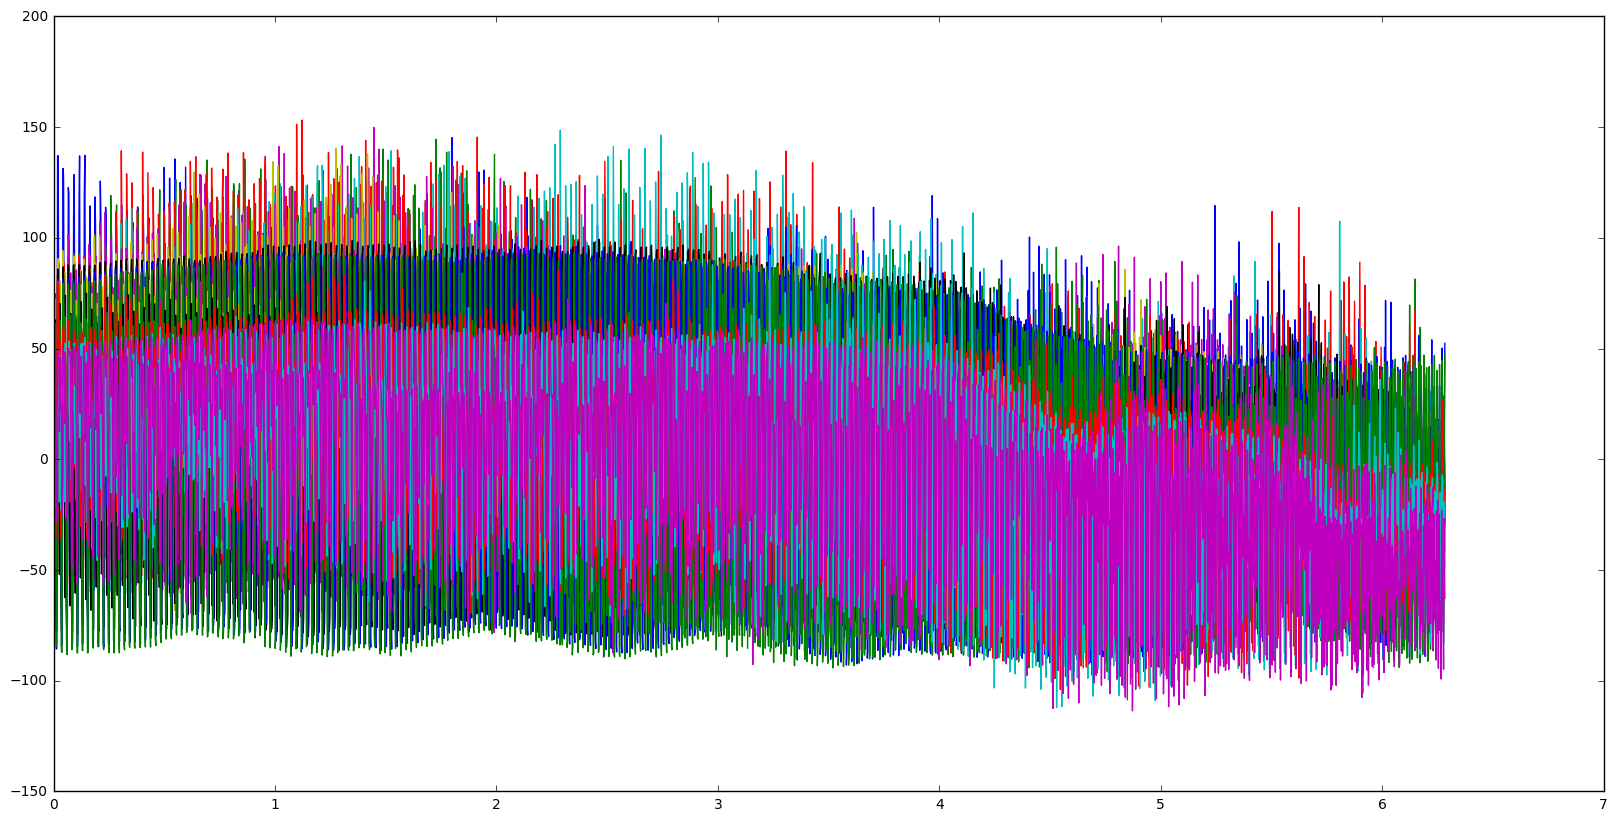

In [337]:
plt.figure(figsize =(20,10))
for band in bands_eq_len:
    plt.plot(band_eq_vec, band)

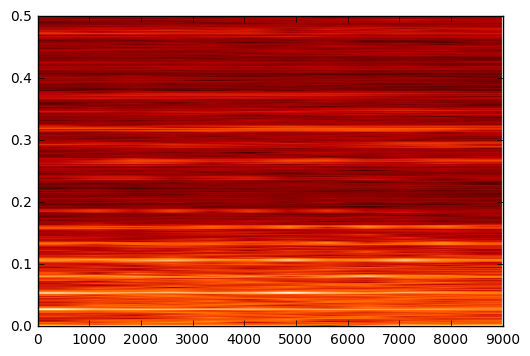

In [338]:
Pxx, freqs, bins, img = plt.specgram(np.sum(bands_eq_len,axis=0), NFFT=1024, Fs=1, noverlap=256,
                                cmap=plt.cm.gist_heat)

In [370]:
print (len(bands))

12


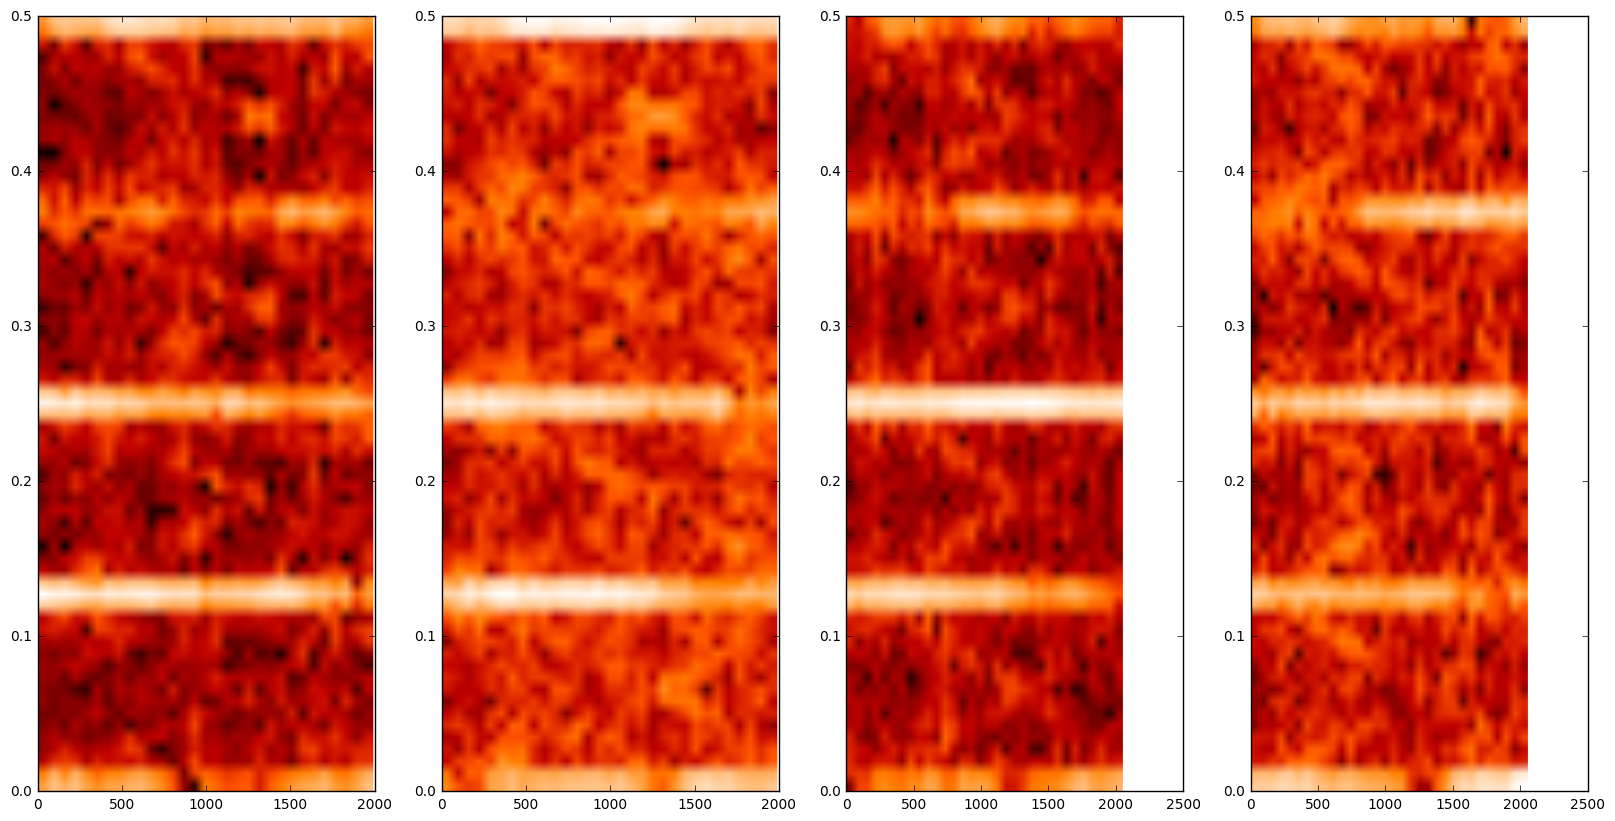

In [373]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,10))
spec1, freqs, t, img = ax1.specgram(bands[0], NFFT=128, Fs=1, noverlap=64,
                                cmap=plt.cm.gist_heat)
spec2, freqs, t, img = ax2.specgram(bands[3], NFFT=128, Fs=1, noverlap=64,
                                cmap=plt.cm.gist_heat)
spec3, freqs, t, img = ax3.specgram(bands[7], NFFT=128, Fs=1, noverlap=64,
                                cmap=plt.cm.gist_heat)
spec4, freqs, t, img = ax4.specgram(bands[11], NFFT=128, Fs=1, noverlap=64,
                                cmap=plt.cm.gist_heat)

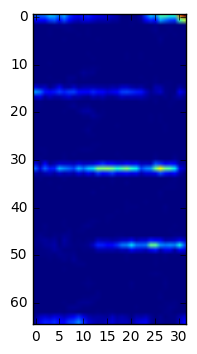